In [9]:
#import library
import os
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [11]:
#path to csv data 
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [ ]:
#convert csv to numpy 
train = np.loadtxt(path_train, delimiter=',', skiprows=1)
test = np.loadtxt(path_test, delimiter=',', skiprows=1)

In [ ]:
#training data
X_train = train[:,1:]
y_train = train[:,0]

#testing data 
X_test = test[:,1:]
y_test = test[:,0]

### Data Augmentation

The extra dimension is added to the image array to represent the batch size for the Keras data generator. The Keras data generator expects an input array of rank 4, where the first dimension represents the batch size.

Since we are passing one image at a time to the data generator, we need to add an extra dimension to the image array to make its shape (1, height, width, channels). The batch size of 1 tells the generator that we are passing one image at a time, and the height and width are the dimensions of the image, while the number of channels represents the color channels of the image.

In [19]:
# Reshape the data to images adding color dimention
X_train = X_train.reshape(X_train.shape[0], res[0], res[1], 1)
X_test = X_test.reshape(X_test.shape[0], res[0], res[1], 1)


In [20]:
# Creating an ImageDataGenerator object with data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest')

In [22]:
# Apply data augmentation to the training set
X_train_augmented = []
y_train_augmented = []
for i in range(X_train.shape[0]):
    img = X_train[i]
    label = y_train[i]
    for j in range(2):
        x_augmented = datagen.random_transform(img)
        X_train_augmented.append(x_augmented)
        y_train_augmented.append(label)

In [23]:
# Apply data augmentation to the test set
X_test_augmented = []
y_test_augmented = []
for i in range(X_test.shape[0]):
    img = X_test[i]
    label = y_test[i]
    for j in range(2):
        x_augmented = datagen.random_transform(img)
        X_test_augmented.append(x_augmented)
        y_test_augmented.append(label)

In [24]:
# Convert the augmented data to numpy arrays
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
X_test_augmented = np.array(X_test_augmented)
y_test_augmented = np.array(y_test_augmented)

In [25]:
# Save the augmented data to files
np.savez_compressed('../data/external/sign_data_augmented.npz',
                    X_train=X_train_augmented,
                    y_train=y_train_augmented,
                    X_test=X_test_augmented,
                    y_test=y_test_augmented)


In [26]:
# Load the augmented data from the file
data = np.load('../data/external/sign_data_augmented.npz')

# Extract the X_train, y_train, X_test, and y_test arrays from the data
X_train_augmented = data['X_train']
y_train_augmented = data['y_train']
X_test_augmented = data['X_test']
y_test_augmented = data['y_test']


In [27]:
# Print the shapes of the augmented data
print(f'X_train_augmented shape: {X_train_augmented.shape}')
print(f'y_train_augmented shape: {y_train_augmented.shape}')
print(f'X_test_augmented shape: {X_test_augmented.shape}')
print(f'y_test_augmented shape: {y_test_augmented.shape}')

X_train_augmented shape: (54910, 28, 28, 1)
y_train_augmented shape: (54910,)
X_test_augmented shape: (14344, 28, 28, 1)
y_test_augmented shape: (14344,)


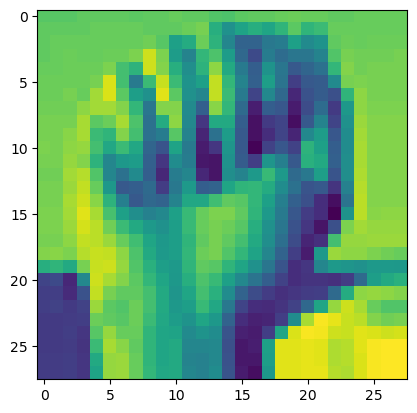

In [31]:
#visualization
import matplotlib.pyplot as plt
plt.imshow(X_test_augmented[6]);

In [33]:
# Flatten the training data
X_train_flat = X_train_augmented.reshape(X_train_augmented.shape[0], -1)

# Flatten the testing data
X_test_flat = X_test_augmented.reshape(X_test_augmented.shape[0], -1)

# Print the shapes of the augmented data
print(f'X_train_augmented shape: {X_train_flat.shape}')
print(f'y_train_augmented shape: {y_train_augmented.shape}')
print(f'X_test_augmented shape: {X_test_flat.shape}')
print(f'y_test_augmented shape: {y_test_augmented.shape}')


X_train_augmented shape: (54910, 784)
y_train_augmented shape: (54910,)
X_test_augmented shape: (14344, 784)
y_test_augmented shape: (14344,)


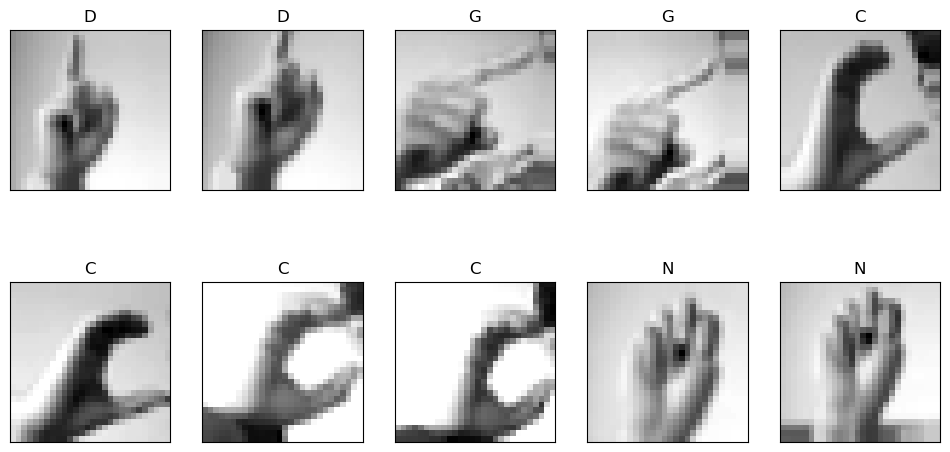

In [35]:
# Define the class names
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L','M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X','Y', 'Z']

# Visualize some of the augmented images
fig, axes = plt.subplots(2, 5, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_augmented[i].squeeze(), cmap='gray')
    ax.set_title(class_names[int(y_train_augmented[i])])

plt.show()
